# Analysing Sentiment without Location

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df = pd.read_csv('../Data/sentiments_nogeo.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_year'] = df['date'].apply(lambda x: x.strftime('%m-%Y')) 

In [4]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment,year,month,month_year
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",wa beautiful visit coton manor northamptonshir...,0.6808,0.215,0.087,0.698,positive,2021,5,05-2021
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u map heating global warming real thing know c...,0.4767,0.227,0.000,0.773,positive,2021,5,05-2021
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",hedgeaz n new hedge much say possibly another ...,0.8724,0.296,0.000,0.704,positive,2021,5,05-2021


In [5]:
#extracting hashtags
df['hashtags'] = df['content'].str.findall(r'\#(\w*)').apply(', '.join)

In [6]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment,year,month,month_year,hashtags
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",wa beautiful visit coton manor northamptonshir...,0.6808,0.215,0.087,0.698,positive,2021,5,05-2021,
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u map heating global warming real thing know c...,0.4767,0.227,0.000,0.773,positive,2021,5,05-2021,"DemVoice1, wtpEARTH, wtpBLUE, wtpEDU, ONEV1"
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",hedgeaz n new hedge much say possibly another ...,0.8724,0.296,0.000,0.704,positive,2021,5,05-2021,HedgeAZ


In [7]:
#most popular hashtags
hashtags_popular = df.content.str.extractall(r'\#(\w*)')[0].value_counts()
#most popular mentions
mentions_popular = df.content.str.extractall(r'\@(\w*)')[0].value_counts()

In [8]:
hashtags_popular.nlargest(30)

climatechange          14078
ClimateChange          10435
ClimateAction           3703
ClimateCrisis           3119
GlobalWarming           2539
climate                 2247
sustainability          1586
environment             1547
ClimateEmergency        1444
globalwarming           1056
COP26                    796
climateaction            745
Climate                  674
EV                       627
Climatechange            616
Sustainability           610
Tesla                    607
RenewableEnergy          587
Renewables               585
climatecrisis            524
auspol                   518
nature                   486
energy                   484
dystopia                 476
COVID19                  460
climatechangeaction      428
art                      422
ESG                      402
ClimateActionNow         392
sustainable              382
Name: 0, dtype: int64

In [92]:
def generate_wordcloud(x):
    
    x = x[5:] #taking out climate change hashtags

    word_cloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=70).generate_from_frequencies(x)
    plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    #plt.show()

In [117]:
#generate_wordcloud(hashtags_popular)
#plt.savefig('../Figures/a_popularhashtags.png')

In [116]:
#generate_wordcloud(mentions_popular)
#plt.savefig('../Figures/a_popularmentions.png')

**Most Common Words**

In [12]:
import nltk 

reviews = ''

for review in df['content_clean']:
    reviews += review

corpus = nltk.sent_tokenize(reviews)

In [13]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [14]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys())]

In [15]:
corpus.sort(reverse = True)
corpus

[(76002, 'climate'),
 (66055, 'change'),
 (19072, 'climatechange'),
 (16141, 'global'),
 (12168, 'warming'),
 (7708, 'u'),
 (7479, 'ha'),
 (5950, 'new'),
 (5844, 'people'),
 (5615, 'world'),
 (5290, 'need'),
 (4831, 'year'),
 (4433, 'like'),
 (4409, 'help'),
 (4278, 'carbon'),
 (4131, 'action'),
 (4085, 'impact'),
 (4070, 'may'),
 (3996, 'one'),
 (3800, 'emission'),
 (3770, 'wa'),
 (3726, 'energy'),
 (3598, 'make'),
 (3542, 'environment'),
 (3538, 'time'),
 (3356, 'could'),
 (3322, 'climateaction'),
 (3227, 'get'),
 (3204, 'take'),
 (3066, 'future'),
 (3010, 'say'),
 (2972, 'real'),
 (2930, 'climatecrisis'),
 (2862, 'way'),
 (2698, 'globalwarming'),
 (2679, 'water'),
 (2657, 'day'),
 (2634, 'want'),
 (2631, 'human'),
 (2576, 'sustainability'),
 (2515, 'issue'),
 (2513, 'green'),
 (2495, 'think'),
 (2436, 'earth'),
 (2431, 'planet'),
 (2416, 'health'),
 (2400, 'solution'),
 (2393, 'thing'),
 (2392, 'country'),
 (2378, 'would'),
 (2334, 'food'),
 (2332, 'science'),
 (2267, 'see'),
 (2266

In [115]:
#generate_wordcloud(wordfreq)

**Negative Sentiment Hashtags**

In [107]:
df_neg = df[df['negative'] > 0.4]

In [108]:
df_neg.head(2)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment,year,month,month_year,hashtags
6,6,1394326370692616193,2021-05-17,Climate change optimism should be dead. Show u...,NaN,NaN,"{'username': 'Spencer_Berg_', 'displayname': '...",climate change optimism dead show blow bitch,-0.6808,0.224,0.519,0.256,negative,2021,5,05-2021,
34,34,1394325001067630593,2021-05-17,ARE YOU TELLING ME FUCKING CLIMATE CHANGE IS W...,NaN,NaN,"{'username': 'hellostarshine_', 'displayname':...",telling fucking climate change im itchy hurt,-0.6705,0.000,0.524,0.476,negative,2021,5,05-2021,


In [109]:
#Popular negative hashtags
hashtags_popular_neg = df_neg.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

In [111]:
#generate_wordcloud(hashtags_popular_neg)
#plt.savefig('../Figures/a_neg_popularhashtags.png')

**Positive Sentiment Hashtags**

In [112]:
df_pos = df[df['positive'] > 0.3]

hashtags_popular_pos = df_pos.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(hashtags_popular_pos)
#plt.savefig('../Figures/a_pos_popularhashtags.png')

**Mentions Negative Sentiment**

In [113]:
mentions_popular_neg = df_neg.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(mentions_popular_neg)
#plt.savefig('../Figures/a_neg_popularmentions.png')

**Mentions Positive Sentiment**

In [114]:
mentions_popular_pos = df_pos.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(mentions_popular_pos)
#plt.savefig('../Figures/a_pos_popularmentions.png')

**Trends and Time Trends**

In [25]:
sentiment = df.groupby(['sentiment'])['id'].count().reset_index().rename(columns={'id': 'count'})

In [26]:
sentiment

,sentiment,count
0,negative,30109
1,neutral,23975
2,positive,54209


In [27]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [28]:
#Sentiment over time

sentiment_time = df.groupby(['date'])['comp'].mean().to_frame().reset_index().rename(columns={'comp': 'avg_comp'})

In [29]:
sentiment_time

,date,avg_comp
0,2021-04-30,0.034568
1,2021-05-01,0.084759
2,2021-05-02,0.084655
3,2021-05-03,0.111670
4,2021-05-04,0.125633
5,2021-05-05,0.153440
6,2021-05-06,0.149322
7,2021-05-07,0.136582
8,2021-05-08,0.101136
9,2021-05-09,0.105698


<AxesSubplot:xlabel='date', ylabel='avg_comp'>

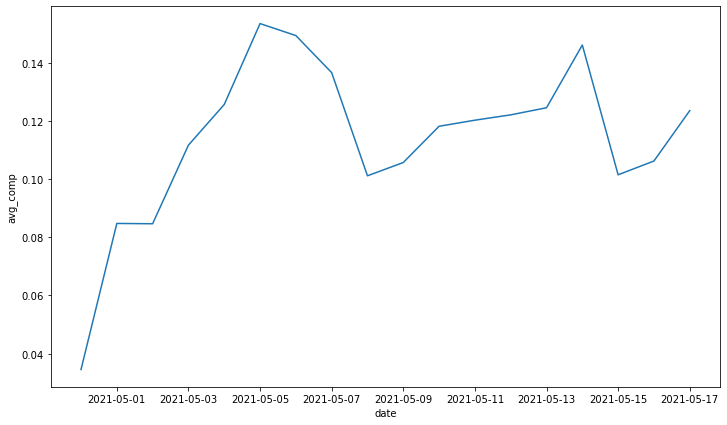

In [30]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='date', y='avg_comp', data=sentiment_time)

**NMF Model**

In [31]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [80]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

add_stop_words = ['climate change', 'climate', 'global warming', 'amp', 'climatechange', 'global', 'warming', 
                  'globalwarming', 'just', 'climateaction', 'change', 'really', 'eco', 'climatechange', 'look', 'like', 
                  'problem', 'believe', 'struck', 'cross', 'big', 'important', 'think', 'bigger', 'climatechangeisreal', 'climatechangeart',
                  'extremeweather', 'climatechangeaction', 'planet']

vectorizer = TfidfVectorizer(ngram_range = (2,3), max_df = 0.95, min_df = 3, stop_words=add_stop_words)
doc_word_nmf = vectorizer.fit_transform(df['content_clean'])
nmf_model = NMF(10)
doc_topic_nmf = nmf_model.fit_transform(doc_word_nmf)
    
topics_list = display_topics(nmf_model, vectorizer.get_feature_names(), 15)


Topic  0
promised protect last, promised protect, oldgrowth forest, alarming rate forest, forest yet logging, rate forest worth, worth standing, forest worth standing, forest yet, yet logging, oldgrowth forest yet, forest worth, rate forest, stand oldgrowth forest, last stand

Topic  1
rancher forester, farmer rancher forester, take action support, farmer rancher, forester vital, birdstellus farmer rancher, birdstellus farmer, rancher forester vital, action support, support growingclimatesolutions, action support growingclimatesolutions, growingclimatesolutions act, support growingclimatesolutions act, vital take action, forester vital take

Topic  2
tesla ev, tesla ev renewables, ev renewables renewableenergy, ev renewables, renewables renewableenergy, electricvehicles tesla ev, electricvehicles tesla, tesla model, ford mustang, electric vehicle, electric car, sandy munro, vw id, elon musk, volkswagen id

Topic  3
reduce carbon emission, least new, help stop, new financing, world nee